In [1]:
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

import pydot
import graphviz
pydot.find_graphviz = lambda: True

In [3]:
# read training data 
train_df = pd.read_csv('X_train1.csv', header=None)
train_df.shape

(7352, 561)

In [4]:
subject_train = pd.read_csv('subject_train.txt', header = None)
subject_train.shape

(7352, 1)

In [5]:
# X_train = pd.concat([train_df, subject_train], axis = 1, join_axes=[train_df.index])
# X_train.head()
# X_train.shape
#loading test data
X_test = pd.read_csv('X_test1.csv', header= None)
y_test = pd.read_csv('y_test.txt', header = None)
y_test_cat = to_categorical(y_test)
X_test.shape

(2947, 561)

In [6]:
Y_train = pd.read_csv('y_train.txt', header = None)
Y_train_cat = to_categorical(Y_train)
Y_train_cat.shape

(7352, 7)

In [7]:
model = Sequential()
model.add(Dense(input_shape = (561,), units = 100))
model.add(Dense(units = 50))
model.add(Dense(units = 20))

model.add(Dense(units=Y_train_cat.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               56200     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 147       
Total params: 62,417
Trainable params: 62,417
Non-trainable params: 0
_________________________________________________________________


In [8]:
%%time
# fit the network
history = model.fit(np.array(train_df), np.array(Y_train_cat), epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')])

Train on 6984 samples, validate on 368 samples
Epoch 1/10
6984/6984 [==============================] - 0s - loss: 1.4087 - acc: 0.5785 - val_loss: 0.4661 - val_acc: 0.8668
Epoch 2/10
6984/6984 [==============================] - 0s - loss: 0.4370 - acc: 0.8704 - val_loss: 0.2891 - val_acc: 0.9457
Epoch 3/10
6984/6984 [==============================] - 0s - loss: 0.3225 - acc: 0.9025 - val_loss: 0.2180 - val_acc: 0.9511
Epoch 4/10
6984/6984 [==============================] - 0s - loss: 0.2653 - acc: 0.9178 - val_loss: 0.1752 - val_acc: 0.9565
Epoch 5/10
6984/6984 [==============================] - 0s - loss: 0.2297 - acc: 0.9275 - val_loss: 0.1474 - val_acc: 0.9620
Epoch 6/10
6984/6984 [==============================] - 0s - loss: 0.1991 - acc: 0.9393 - val_loss: 0.1420 - val_acc: 0.9538
Epoch 7/10
6984/6984 [==============================] - 0s - loss: 0.1784 - acc: 0.9449 - val_loss: 0.1390 - val_acc: 0.9484
Epoch 8/10
6984/6984 [==============================] - 0s - loss: 0.1597 - ac

In [9]:
# training metrics
scores = model.evaluate(np.array(train_df), np.array(Y_train_cat), verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))

4800/7352 [==================>...........] - ETA: 0sAccurracy: 0.9624591972415414


In [10]:
# make predictions and compute confusion matrix
y_pred = model.predict_classes(np.array(train_df),verbose=1, batch_size=200)
y_pred = to_categorical(y_pred)
y_true = np.array(Y_train_cat)
print(y_pred.shape)
print(y_true.shape)
print(y_pred-y_true)
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')



4400/7352 [================>.............] - ETA: 0s(7352, 7)
(7352, 7)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


In [11]:
# test metrics
scores_test = model.evaluate(np.array(X_test), np.array(y_test_cat), verbose=2)
print('Accurracy: {}'.format(scores_test[1]))

Accurracy: 0.926705123874993


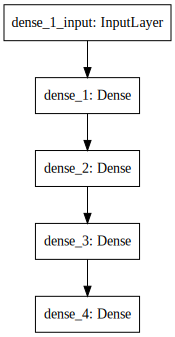

In [12]:
#model visualize
SVG(model_to_dot(model).create(prog='dot', format='svg'))

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


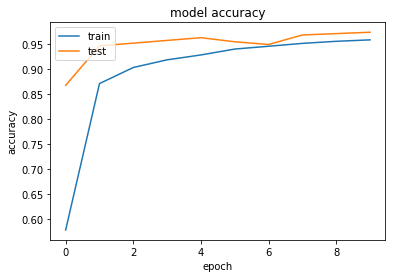

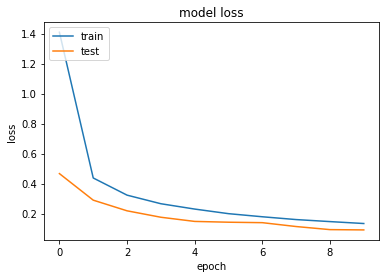

In [13]:
#plots
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()